In [1]:
import pandas as pd
import plotnine as p9
from pyprojroot import here

p9.theme_set(p9.theme_minimal)
print(f"plotnine=={p9.__version__}")

plotnine==0.7.1


In [2]:
df = pd.read_csv(here() / ".data" / "titanic.csv")
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Univariate, Continuous Distribution

### Histogram

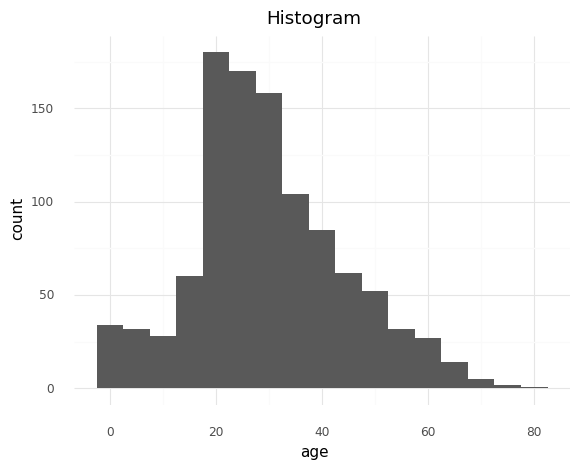

<ggplot: (8775978535888)>

In [3]:
(
    p9.ggplot(df[~df["age"].isna()], p9.aes(x="age"))
    + p9.geom_histogram(binwidth=5)
    + p9.ggtitle("Histogram")
)

## ECDF

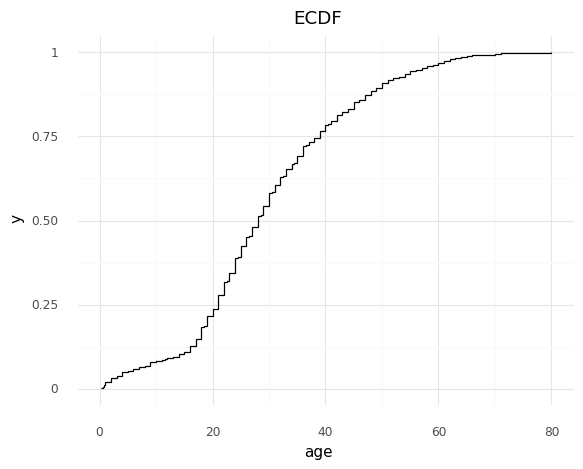

<ggplot: (8775979585440)>

In [4]:
(
    p9.ggplot(df[~df["age"].isna()], p9.aes(x="age"))
    + p9.stat_ecdf()
    + p9.ggtitle("ECDF")
)

## Continuous Distribution, grouped by Categorical

### Box Plots

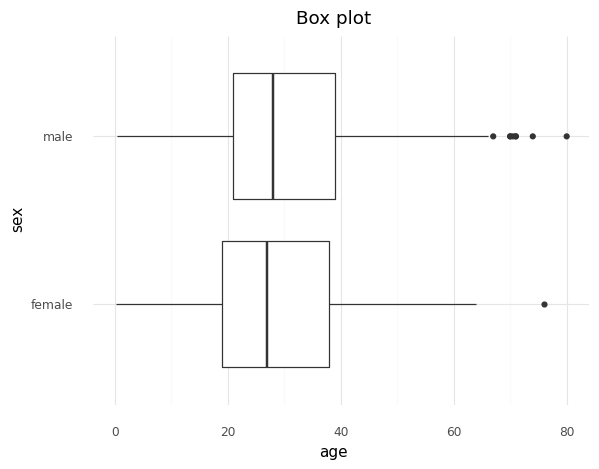

<ggplot: (8775979592789)>

In [5]:
(
    p9.ggplot(df[~df["age"].isna()], p9.aes(x="sex", y="age"))
    + p9.geom_boxplot()
    + p9.coord_flip()
    + p9.ggtitle("Box plot")
)

### Violin Plots

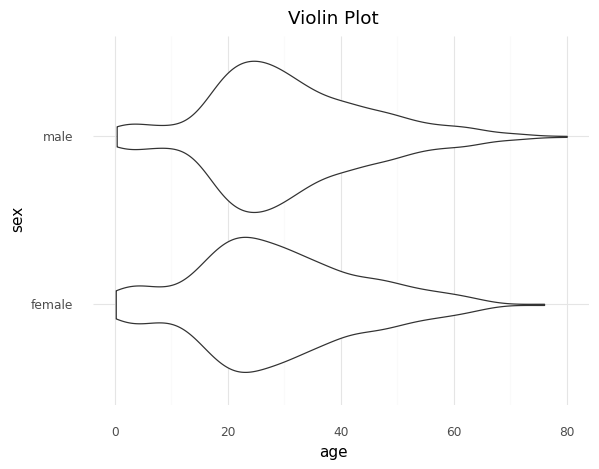

<ggplot: (8775979618829)>

In [6]:
(
    p9.ggplot(df[~df["age"].isna()], p9.aes(x="sex", y="age"))
    + p9.geom_violin()
    + p9.coord_flip()
    + p9.ggtitle("Violin Plot")
)

## Continuous Metric, grouped by Categorical

In [7]:
mean_age_by_pclass = (
    df.groupby("pclass").agg(mean_age=("age", "mean")).reset_index()
)
mean_age_by_pclass

,pclass,mean_age
0,1,39.159918
1,2,29.506705
2,3,24.816367


### Bar Chart

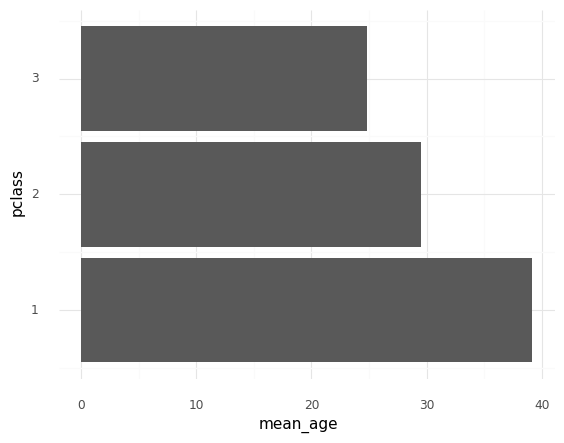

<ggplot: (8775979668294)>

In [8]:
(
    p9.ggplot(mean_age_by_pclass, p9.aes(x="pclass", y="mean_age"))
    + p9.geom_bar(stat="identity")
    + p9.coord_flip()
)